In [2]:
using NLsolve
function f!(F, x)
    F[1] = (x[1]+3)*(x[2]^3-7)+18
    F[2] = sin(x[2]*exp(x[1])-1)
end

function j!(J, x)
    J[1, 1] = x[2]^3-7
    J[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    J[2, 1] = x[2]*u
    J[2, 2] = u
end

sol = nlsolve(f!, j!, [ 4.1; 1.2]);
sol.zero

2-element Vector{Float64}:
 3.7165406293501935
 1.6286567234523883

In [40]:
using NLsolve
function ff!(F, x)
    F[1] = -10*x[1] + 1*x[2] + 1*x[1]^3
    F[2] = -10*x[2] + 1*x[1] + 1*x[2]^3
end

function jj!(J, x)
    J[1, 1] = -10 + 1*3*x[1]^2
    J[1, 2] = 1
    J[2, 1] = 1
    J[2, 2] = -10 + 1*3*x[2]^2
end

sol = nlsolve(ff!, [ 0; 3.0]);
sol.zero

2-element Vector{Float64}:
 0.31783724519578227
 3.1462643699419726

In [3]:
# Caso trímero!
function ff!(F, x)
    λ = 10; V =1; γ = 1;
    F[1] = -λ*x[1] + V*x[2] + γ*x[1]^3
    F[2] = -λ*x[2] + V*(x[1] + x[3]) +  γ*x[2]^3
    F[3] = -λ*x[3] + V*x[2] + γ*x[3]^3
end

sol = nlsolve(ff!, [ -1; 5.0; -1]);
sol.zero

3-element Vector{Float64}:
 0.31617804521362175
 3.1301725894303267
 0.3161780452136218

In [7]:
sol.zero

2-element Vector{Float64}:
 -3.487552413550073e-16
  1.0000000000000002

In [10]:
using Plots, LinearAlgebra

In [97]:
radio = 1; N = 100; theta = 0:2*pi/(N):2*pi-2*pi/N;

In [98]:
x = radio*cos.(theta); y = radio*sin.(theta);

In [99]:
R = [x y]; dr = norm(R[1, :]-R[2, :]);

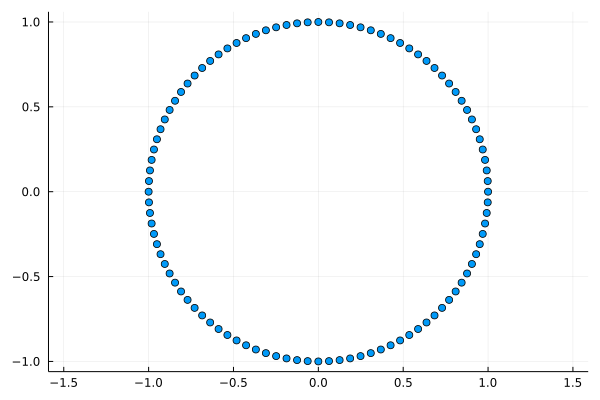

In [100]:
scatter(R[:, 1], R[:, 2], label="", ratio = 1)

In [14]:
#matriz de acoplamiento
V = zeros(ComplexF64, N,N)
for i = 1:N
    for j = 1:N
        if abs(norm(R[i, :] - R[j, :]) - dr) < 1e-5
            V[i, j] = 1
        else
            V[i, j] = 0
        end
    end
end

V[1, end] = 1; V[end, 1] = 1; # Condiciones de contorno abiertas (periódicas)

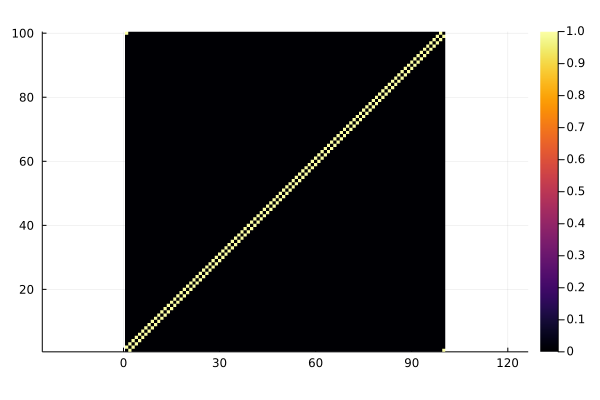

In [15]:
heatmap(real(V), ratio = 1)

### Sistema de ecuaciones
$-\lambda\phi_n + V(\phi_{n-1} + \phi_{n+1}) + \gamma|\psi_n|^2\psi_n = 0$

### Representación matricial
$-\hat{L}\bf{\phi}  + \hat{V}\bf{\phi} + \hat{N}\bf{\phi}= 0$

In [2]:
using NLsolve

In [15]:
function dnlse(F, x)
    λ = 10; V0 =1; γ = 1;
    F[1] = -λ*x[1] + V*x[2] + γ*x[1]^3
    F[2] = -λ*x[2] + V*(x[1] + x[3]) +  γ*x[2]^3
    F[3] = -λ*x[3] + V*x[2] + γ*x[3]^3
end

sol = nlsolve(dnlse, [ -1; 5.0; -1]);
sol.zero

LoadError: MethodError: no method matching +(::Float64, ::Matrix{ComplexF64})
For element-wise addition, use broadcasting with dot syntax: scalar .+ array
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  +(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at mpfr.jl:392
[0m  +([91m::ChainRulesCore.Tangent{P, T} where T[39m, ::P) where P at /Users/ccmejia/.julia/packages/ChainRulesCore/0z6yk/src/differential_arithmetic.jl:162
[0m  ...

In [116]:
V = zeros(N,N)
for i = 1:N
    for j = 1:N
        if abs(norm(R[i, :] - R[j, :]) - dr) < 1e-5
            V[i, j] = 1
        else
            V[i, j] = 0
        end
    end
end

V[1, end] = 1; V[end, 1] = 1;

N = 101

101

In [113]:
radio = 1; N = 101; theta = 0:2*pi/(N):2*pi-2*pi/N;

In [114]:
x = radio*cos.(theta); y = radio*sin.(theta);

In [115]:
R = [x y]; dr = norm(R[1, :]-R[2, :]);

In [117]:
function dnlse(F, x)
    λ = 4; V0 =1; γ = 1;
    F[:] = -λ*diagm(ones(N))*x + V*x + diagm(x.^2)*x
end

x0 = zeros(N); x0[51] = 3.0; #solución localizada
#x0 = 3*ones(N); #solución extendida

sol = nlsolve((F,x) -> dnlse(F, x), x0);

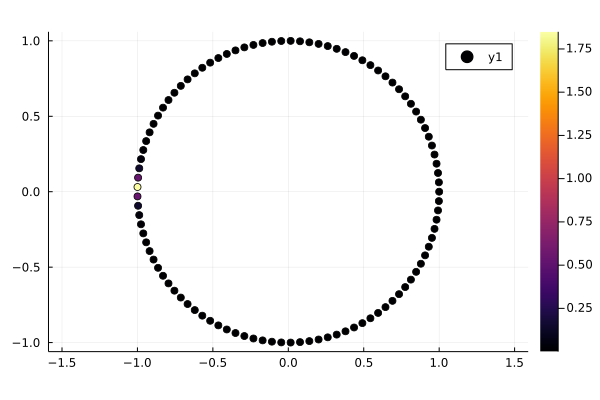

In [118]:
scatter(R[:, 1], R[:, 2], marker_z = sol.zero, ratio = 1)

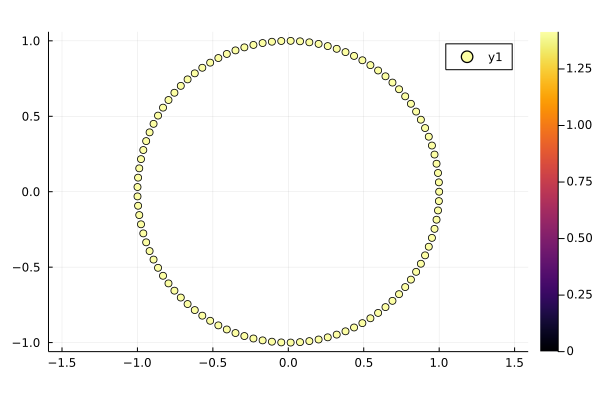

In [119]:
x0 = 3*ones(N); #solución extendida

sol = nlsolve((F,x) -> dnlse(F, x), x0);
scatter(R[:, 1], R[:, 2], marker_z = sol.zero, ratio = 1)

In [122]:
N

101

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.500000e+01              NaN
     1     3.457744e+00     4.362126e+00
     2     4.690796e-01     1.194680e+00
     3     1.405417e-02     1.061458e-01
     4     1.363856e-05     2.165969e-03
     5     1.275602e-11     2.047360e-06


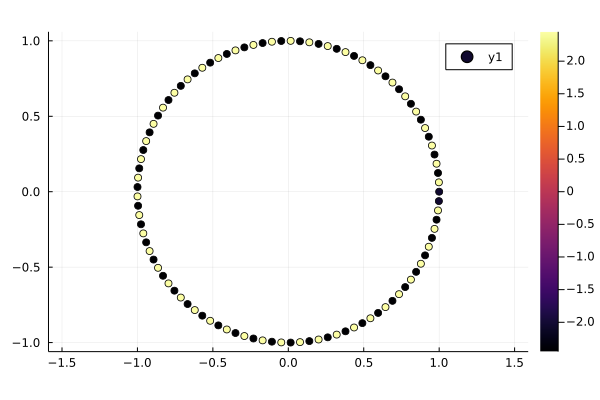

In [121]:
x0 = 3*ones(N); 
x0[1:2:end] = -x0[1:2:end];

#solución extendida alternada

sol = nlsolve((F,x) -> dnlse(F, x), x0, show_trace = :true);
scatter(R[:, 1], R[:, 2], marker_z = sol.zero, ratio = 1)

In [133]:
fase = 0:2pi/N:2pi-2pi/N

0.0:0.062209755516629564:6.220975551662956

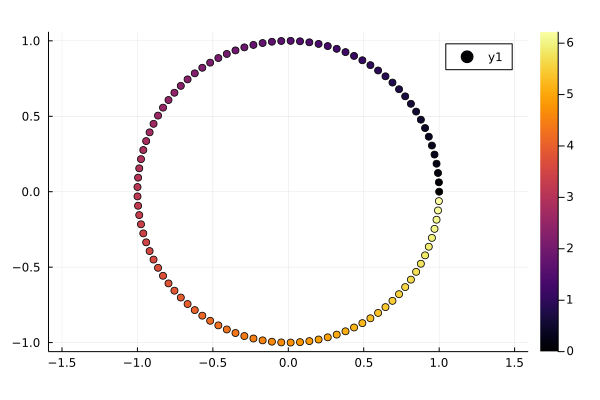

In [134]:
scatter(R[:, 1], R[:, 2], marker_z = fase, ratio = 1)

In [136]:
x0 = 3*ones(N).*exp.(im*fase)

101-element Vector{ComplexF64}:
                3.0 + 0.0im
 2.9941967914007828 + 0.18650891229444158im
 2.9768096170898293 + 0.37229625783977804im
  2.947905744666791 + 0.5566432614884798im
 2.9075969975989984 + 0.738836720496004im
   2.85603932259819 + 0.9181717637636619im
 2.7934321862929785 + 1.0939545788479657im
  2.720017803531218 + 1.2655050961861867im
 2.6360802002978065 + 1.432159620153381im
 2.5419441148733326 + 1.5932733967718251im
  2.437973741484751 + 1.7482231081389024im
 2.3245713213086696 + 1.8964092839229791im
   2.20217558627838 + 2.0372586205976577im
                    ⋮
  2.202175586278379 - 2.037258620597659im
  2.324571321308669 - 1.8964092839229796im
 2.4379737414847495 - 1.7482231081389044im
 2.5419441148733317 - 1.5932733967718264im
 2.6360802002978065 - 1.4321596201533815im
  2.720017803531217 - 1.2655050961861887im
 2.7934321862929785 - 1.0939545788479665im
 2.8560393225981895 - 0.918171763763662im
  2.907596997598998 - 0.7388367204960059im
  2.9479057446667

In [137]:
angle.(x0)

101-element Vector{Float64}:
  0.0
  0.06220975551662957
  0.12441951103325916
  0.1866292665498887
  0.24883902206651826
  0.3110487775831478
  0.37325853309977747
  0.43546828861640685
  0.4976780441330365
  0.5598877996496661
  0.6220975551662956
  0.6843073106829252
  0.7465170661995548
  ⋮
 -0.7465170661995553
 -0.6843073106829254
 -0.6220975551662964
 -0.5598877996496665
 -0.4976780441330366
 -0.43546828861640763
 -0.37325853309977775
 -0.31104877758314786
 -0.24883902206651892
 -0.186629266549889
 -0.12441951103326
 -0.06220975551663014

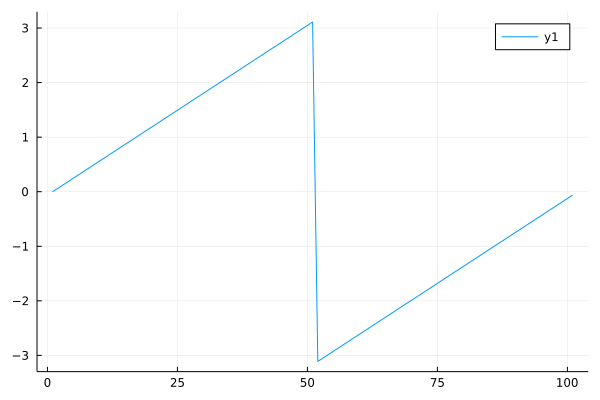

In [138]:
plot(angle.(x0))